# Data Science and Business Analytics (GRIP JUNE, 21)
# The Sparks Foundation

## Task 2 - Prediction Using UnSupervised Learning

### Name: Akshay. S. Vasala

# Importing the Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

# Read the dataset

In [9]:
df = pd.read_csv("csv files/Iris.csv")

In [10]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df =df.drop("Id",axis =1)

In [12]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Chsnging the columns Name as according to my comfort

In [14]:
df.columns = ['Sepal_length',"Sepal_width", "Petal_length", "Petal_width", "Species"]

In [15]:
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**As we can see in below cell that we were finding any missing Values but we didn't find any..**

In [16]:
df.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Species         0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**As we know the dataset has too 5 columns:**
1. Sepal_length
2. Sepal_width
3. Petal_length
4. Petal_width
5. Species

From 1-4 all are  independent Variable and 5 is the dependent Variable

In [29]:
columns=['Sepal_length',"Sepal_width", "Petal_length", "Petal_width"]
list_of_pairs=[[element1, element2] for element1 in columns for element2 in columns if element1!= element2]

**In this above cell, I am making the list of pairs so that i can plot the Scatter plot of that pair to identify the clusters by naked eyes.**


<h3>so Here u can see those things in the below cell<h3>
There are total no of pairs of formed is 12  and we are not using repeated the column in pair exluding that we got !2 pairs and u can see those pairs below in the output of the cell.

In [30]:
print("This are the important pairings where we can find the clusters:\n\n",list_of_pairs)
print("\nTotal no of Pairings:",len(list_of_pairs))

This are the important pairings where we can find the clusters:

 [['Sepal_length', 'Sepal_width'], ['Sepal_length', 'Petal_length'], ['Sepal_length', 'Petal_width'], ['Sepal_width', 'Sepal_length'], ['Sepal_width', 'Petal_length'], ['Sepal_width', 'Petal_width'], ['Petal_length', 'Sepal_length'], ['Petal_length', 'Sepal_width'], ['Petal_length', 'Petal_width'], ['Petal_width', 'Sepal_length'], ['Petal_width', 'Sepal_width'], ['Petal_width', 'Petal_length']]

Total no of Pairings: 12


## Plotting all the pairs 

### Scatter plot

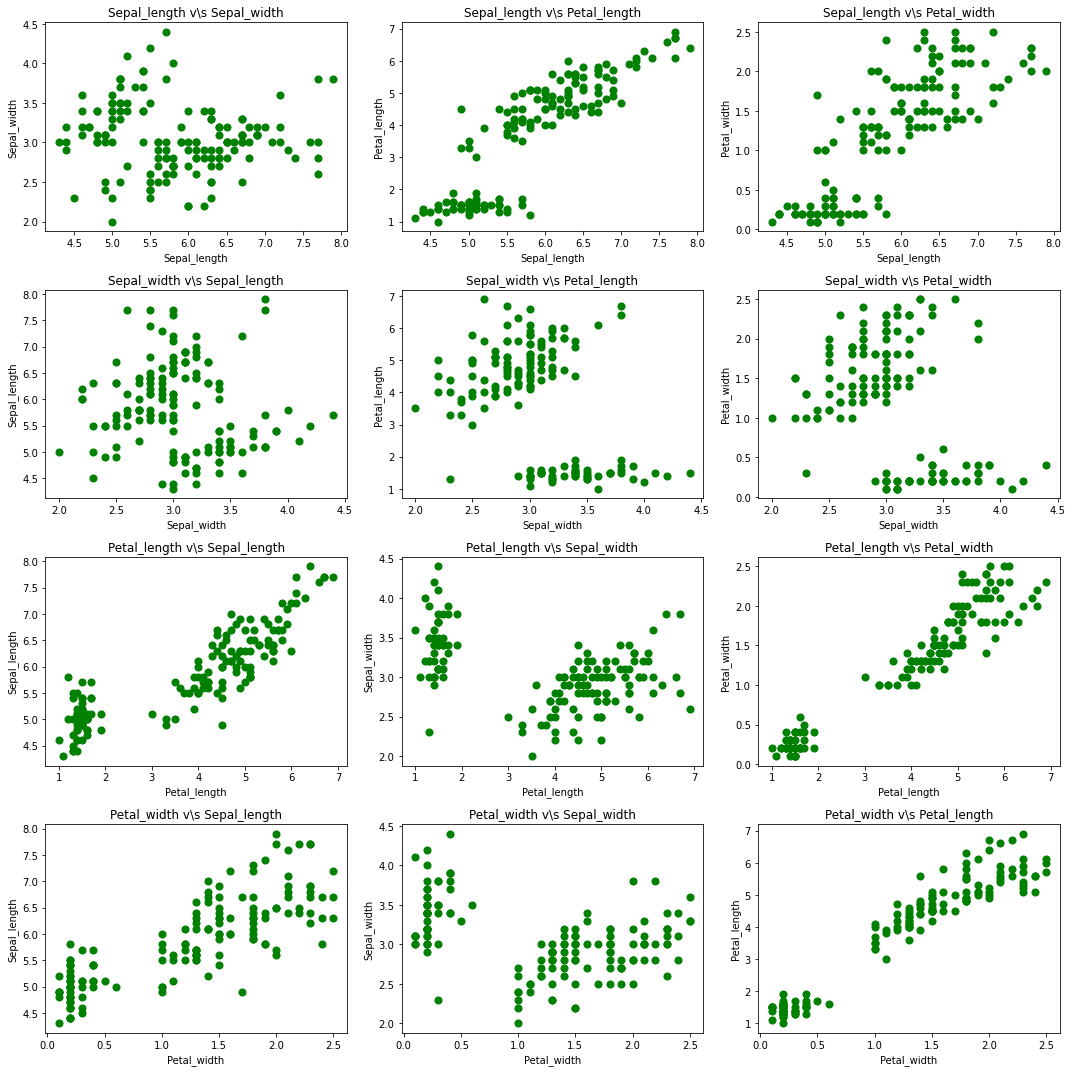

In [74]:
k=0
fig, ax = plt.subplots(4, 3,figsize =(15,15), squeeze =False)
for i in range(4):
    for j in range(3):
        ax[i,j].scatter(df[list_of_pairs[k][0]],df[list_of_pairs[k][1]], s=50,c="green")
        ax[i,j].set_xlabel(list_of_pairs[k][0])
        ax[i,j].set_ylabel(list_of_pairs[k][1])
        ax[i,j].set_title(f"{list_of_pairs[k][0]} v\s {list_of_pairs[k][1]}")
        fig.tight_layout()
        k+=1
plt.show()

## By observing the plots  we can understand that there may be 2 or 3 clusters of any of teh pairing lets prove that By using the algorithm called Kmeans Algorithm.

### K-Means Algorithm

Now we are trying to find the WCSS i.e **Within cluster sum of squares** so after finding that we will plot that on the graph so that we can understand what value we can use for **K** i.e how many no of clusters we can use.

In [161]:
# Now Applying Kmeans Algorithm
X = df.iloc[:, -3:-1].values #---> in this we have Petal_length  and Petal width as our X
wcss=[] #------> Within cluster sum of squares
for i in range(1, 10):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [162]:
wcss

[550.6434666666671,
 86.40394533570999,
 31.38775897435898,
 19.49352336396547,
 13.93330875790876,
 11.06782873941181,
 9.252995959595964,
 7.737751966873709,
 6.472894541406304]

### No of CLusters vs WCSS

Here we will use the method called elbow method to take the optimal no of clusters as the cluster so our model ca predict carefully and correctly.

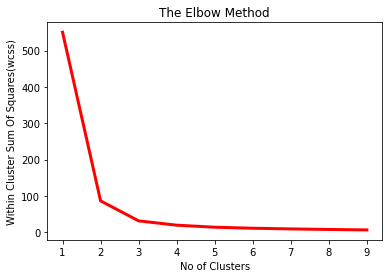

In [163]:
# plotting our wcss(within cluster sum of squares) to find that which cluster no is  best for the model
plt.plot(range(1, 10), wcss, lw=3, c="red")
plt.xlabel("No of Clusters")
plt.ylabel("Within Cluster Sum Of Squares(wcss)")
plt.title("The Elbow Method")
plt.show()

**So by looking at the plot we understood that the at point 3 the line is getting segregated by others means that there we can see that the graph is making something like elbow shape.**

In [164]:
# so by this plot we got the best cluster as K=3 so the number of cluster we can use is 3.
# so Now we will plot this on the graph so that we can understand the what are things are comming in the clusters

#Now Modelling using the size of cluster as 3


kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

y_cluster_pred = kmeans.fit_predict(X)

In [165]:
y_cluster_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Plotting using the predicted clusters found by the model.

## So  we can see the 3 clusters plotted very nicely

In this case, we have used the features as **Petal width** and **Petal Length** as x and y axis.

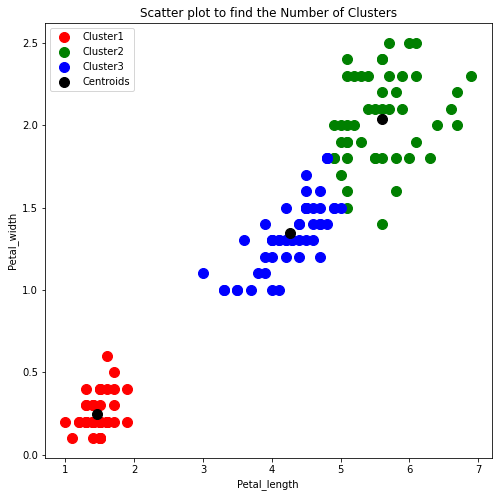

In [166]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_cluster_pred==0,0], X[y_cluster_pred==0,1], c="red", s=100,label="Cluster1")
plt.scatter(X[y_cluster_pred==1,0], X[y_cluster_pred==1,1], c="green", s=100,label="Cluster2")
plt.scatter(X[y_cluster_pred==2,0], X[y_cluster_pred==2,1], c="blue", s=100,label="Cluster3")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], label ="Centroids",c="black", s=100)
plt.xlabel("Petal_length")
plt.ylabel("Petal_width")
plt.title("Scatter plot to find the Number of Clusters")
plt.legend()
plt.show()

### Now the same process  we will perform w.r.t  the features called  Sepel length and Sepal width

In [168]:
##  now we will find this clusters using different features like Sepal length and Sepal Width
X1 =  df.loc[:,list_of_pairs[0]].values
wcss=[] #------> Within cluster sum of squares
for i in range(1, 10):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

In [169]:
wcss

[130.18093333333334,
 57.98240604207882,
 37.1237021276596,
 27.98254281735862,
 20.929315007091848,
 17.23869523809524,
 14.726624558040005,
 12.986040764790772,
 11.105030423280425]

## The Elbow Method


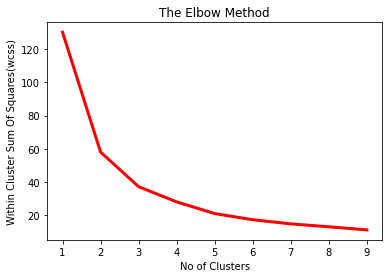

In [170]:
plt.plot(range(1, 10), wcss, lw=3, c="red")
plt.xlabel("No of Clusters")
plt.ylabel("Within Cluster Sum Of Squares(wcss)")
plt.title("The Elbow Method")
plt.show()

In [173]:
###Now for the feature Sepal Width and  Sepal_length again we got the no of Clusters as 3 by using the Elbow method

kmeans = KMeans(n_clusters=3)

y_cluster_pred = kmeans.fit_predict(X1)

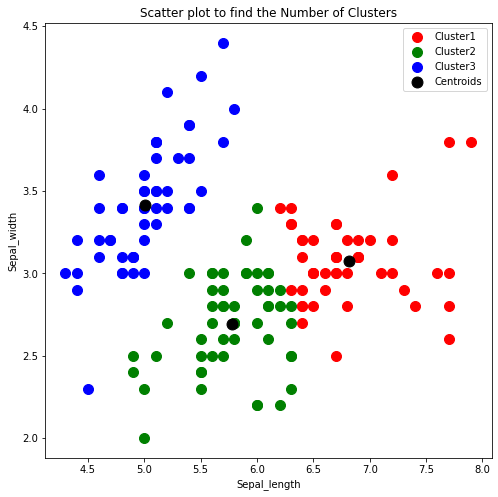

In [174]:
plt.figure(figsize=(8,8))
plt.scatter(X1[y_cluster_pred==0,0], X1[y_cluster_pred==0,1], c="red", s=100,label="Cluster1")
plt.scatter(X1[y_cluster_pred==1,0], X1[y_cluster_pred==1,1], c="green", s=100,label="Cluster2")
plt.scatter(X1[y_cluster_pred==2,0], X1[y_cluster_pred==2,1], c="blue", s=100,label="Cluster3")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], label ="Centroids",c="black", s=120)
plt.xlabel("Sepal_length")
plt.ylabel("Sepal_width")
plt.title("Scatter plot to find the Number of Clusters")
plt.legend()
plt.show()

## Conclusion

**So by this we understood that this dataset contains 3 no of clusters and it has been proved right the because the dependent variable contains three unique identification i.e Iris_setosa, Iris_versicolar, Iris_verginica.. It simply means that there may be 3 clusters and our Elbow method perform greatly... So means we have predicted very much greatly.**